In [1]:
from matplotlib import pyplot as plt
from tiler import Tiler, Merger
import numpy as np
import cv2
import random

/opt/homebrew/anaconda3/envs/vesuvius-challenge-ink-detection-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_path = '../data/raw/train/1/inklabels.png' # inklabels.png or mask.png
tile_size = 256

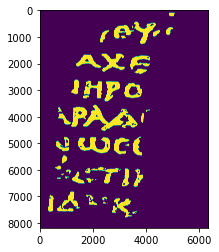

In [3]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = np.expand_dims(image, axis=2)
plt.imshow(image)

In [4]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [8]:
tiler = Tiler(data_shape=image.shape,
              tile_shape=(tile_size, tile_size, 3),
              overlap=0.5,
              channel_dimension=2)

new_shape, padding = tiler.calculate_padding()
tiler.recalculate(data_shape=new_shape)
padded_image = np.pad(image, padding)

merger = Merger(tiler, window='triang')

# for tile_id, tile in tiler(padded_image):
#     plt.figure()
#     plt.imshow(tile)

for tile_id, tile in tiler(padded_image):
    angle = random.randint(0, 180)
    tile = rotate_image(tile, angle)
    merger.add(tile_id, tile)

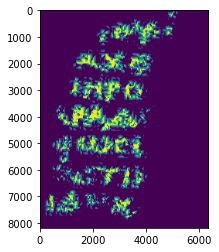

In [9]:
merged_image = merger.merge(extra_padding=padding)
plt.imshow(merged_image)